<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/08_Base_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Base Decision Tree Classifier</h1>

## Overview      

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section following steps are performed: </p>
    <ol>
        <li>Data Preparation and Encoding</li>
        <li>Development of Initial Decision Tree Classification Model with selected input features</li>
        <li>Decision Tree Model Optimization with Minimal Cost Complexity Pruning</li>
        <li>Development of Base Decision Tree Classification Model with optimized Cost Complexity Pruning</li>
        <li>k-Fold Cross Validation</li>
        <li>Model Learning Curve</li>
    </ol>
</div>


### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set() 

In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Data Preparation and Encoding

#### 1.1 Import Modified Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv')

In [5]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
data_df = pd.read_csv(url)

In [6]:
# Selected Features
CATEGORICAL_FEATURES = ['stage_id','relation', 'parent_answering_survey', 'parent_school_satisfaction','student_absence_days']
NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']
TARGET = ['class']

In [7]:
# Optimize Data Type for efficent memory utilization
for feature in CATEGORICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('category')
    
for feature in NUMERICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('int8')

data_df[TARGET] = data_df[TARGET].astype('category')

#### 1.2 Encode Data

In [8]:
# Input Features Encoding
categorical_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = categorical_encoder.fit_transform(data_df[CATEGORICAL_FEATURES])
categorical_encoded = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')
# Target Encoding
target_encoder = LabelEncoder()
target_ds = target_encoder.fit_transform(data_df[TARGET])
target_encoded = pd.DataFrame(target_ds, columns=TARGET, dtype='int8')
# Combine the Data
encoded_df = pd.concat([categorical_encoded,data_df[NUMERICAL_FEATURES]], axis=1)

### 2.  Development of Initial Decision Tree Classification Model with selcted input features

In [9]:
X = encoded_df
y = target_encoded

In [10]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Preliminary Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

#### 2.1 Model Parameters

In [12]:
# Model parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [13]:
# Train the model
clf = clf.fit(X_train, y_train)

#### 2.2 Decision Tree Structure

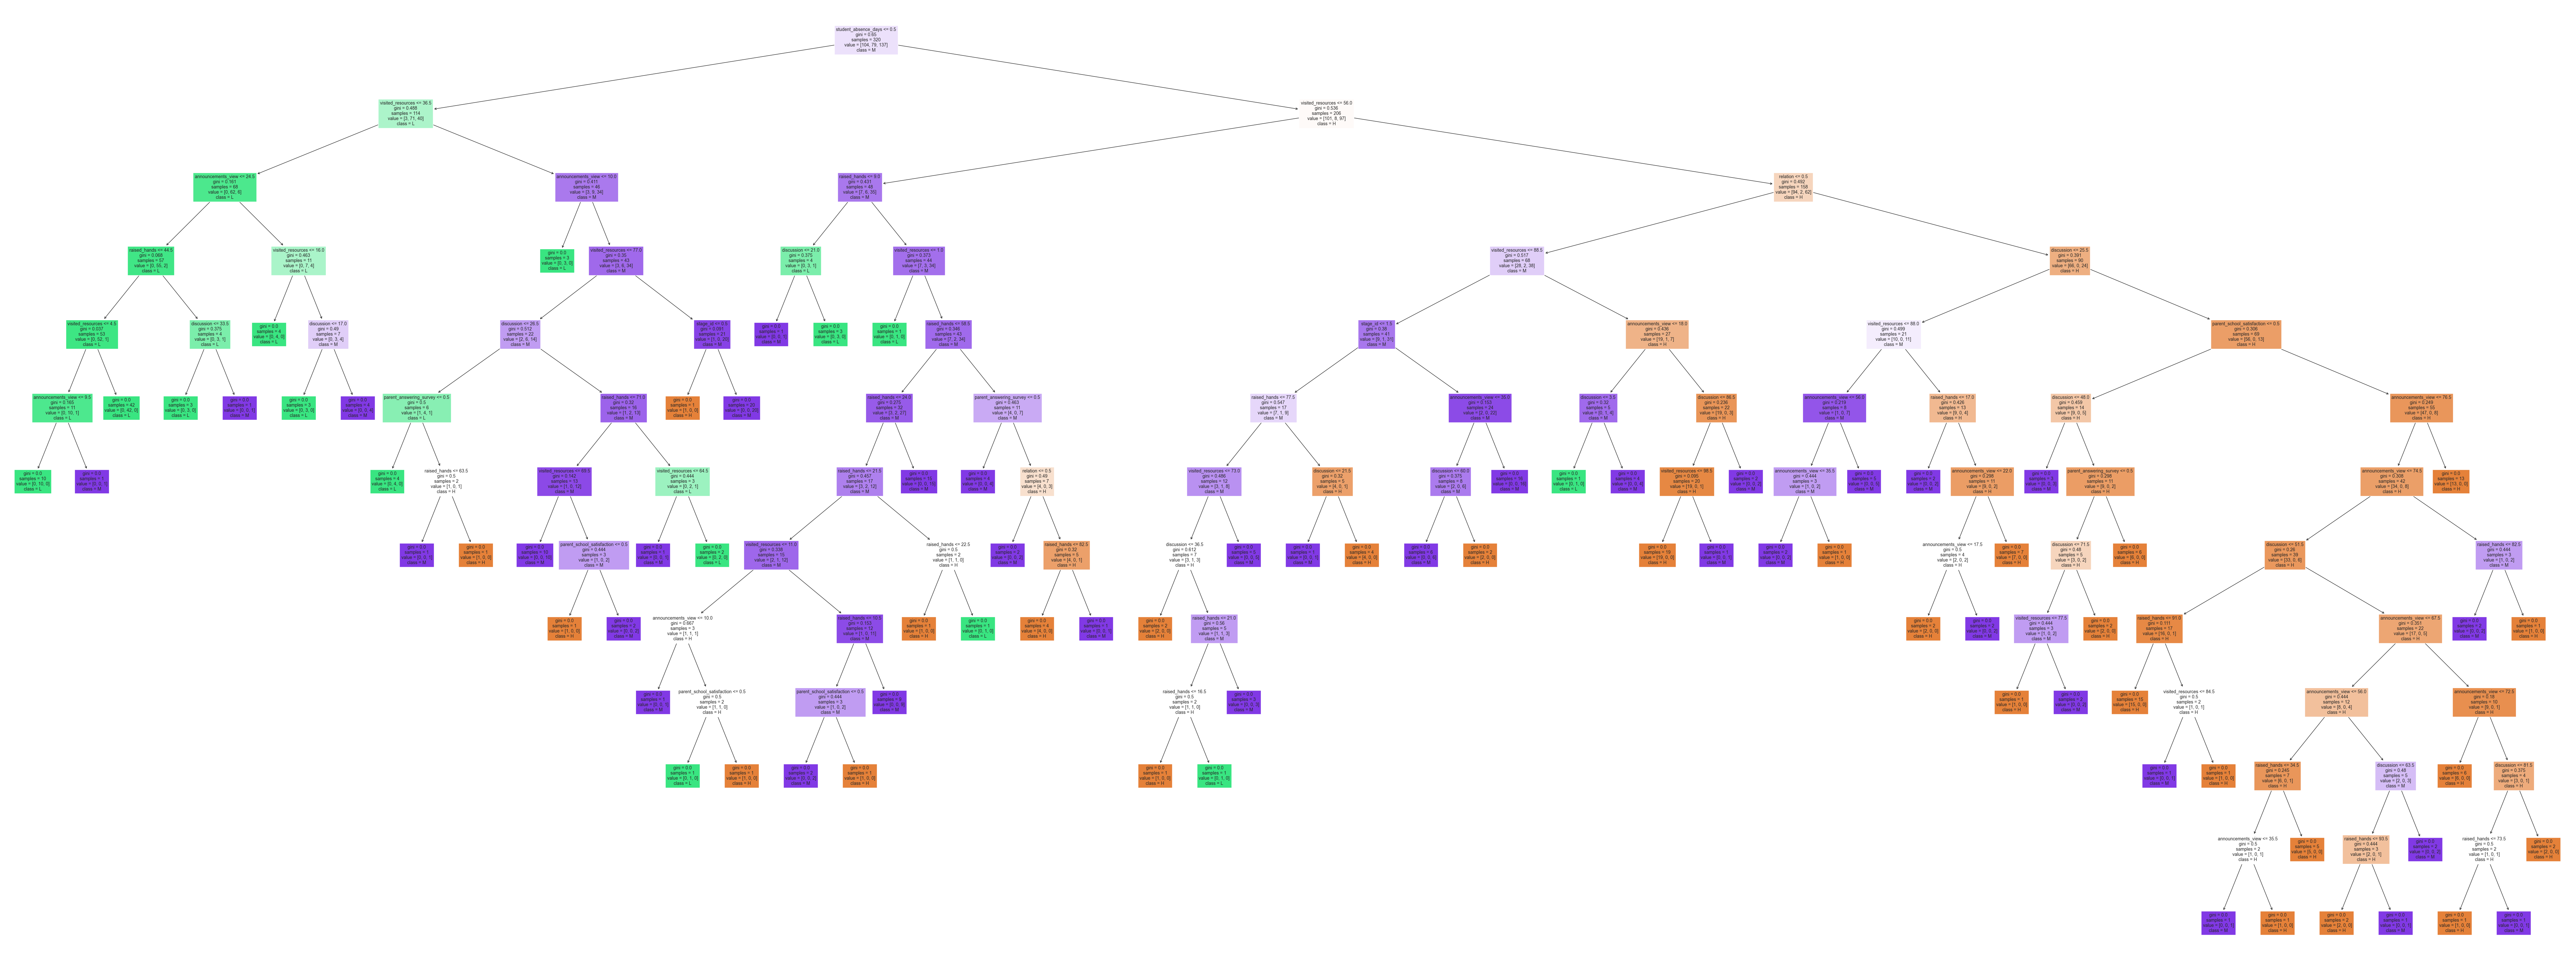

In [14]:
fig = plt.figure(figsize=(80,30))
_=plot_tree(clf, feature_names = X.columns,
                 class_names ={0:'H', 1:'L', 2:'M'},
                 filled = True,
                  fontsize=10)

In [15]:
# Get the maximum depth of the tree
print(f'Initial Model Decision Tree Depth : {clf.get_depth()}')
# Number of leaves 
print(f'Initial Model Decision Tree, Number of Leaves : {clf.get_n_leaves()}')

Initial Model Decision Tree Depth : 12
Initial Model Decision Tree, Number of Leaves : 78


#### 2.3 Model Scores

In [16]:
# Test Accuracy
y_hat = clf.predict(X_test)
initial_test_accuracy = accuracy_score(y_test, y_hat)
print(f'Initial DT Test Accuracy: {initial_test_accuracy*100}')
# Train Accuracy
predictions_train = clf.predict(X_train)
initial_train_accuracy = accuracy_score(y_train, predictions_train)
print(f'Initial DT Train Accuracy: {initial_train_accuracy*100}')

Initial DT Test Accuracy: 70.88607594936708
Initial DT Train Accuracy: 100.0


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the model on Training Data (100%) is greater than the accuracy on Test Data (70.89%), show overfitting in the model. Decision Trees with maximum depth tends to overfit. </p>
</div>

#### 2.4 Confusion Matrix

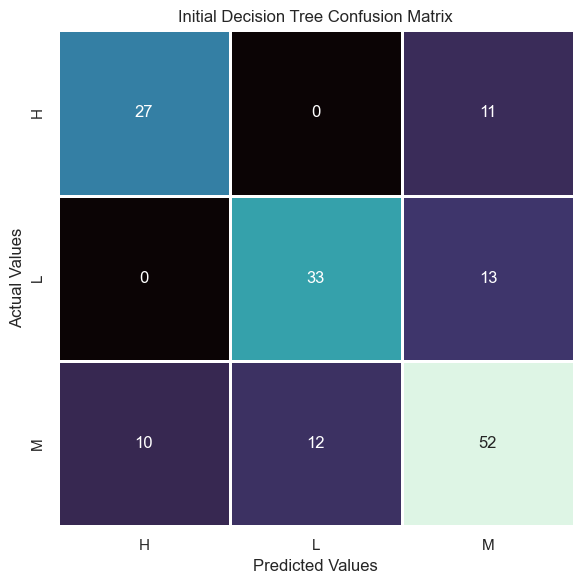

In [17]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_hat),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Initial Decision Tree Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 2.5 Classification Report

In [18]:
print('Initial DT Classification Report\n')
print(classification_report(y_test,y_hat, target_names=['H','L','M']))

Initial DT Classification Report

              precision    recall  f1-score   support

           H       0.73      0.71      0.72        38
           L       0.73      0.72      0.73        46
           M       0.68      0.70      0.69        74

    accuracy                           0.71       158
   macro avg       0.72      0.71      0.71       158
weighted avg       0.71      0.71      0.71       158



### 3. Decision Tree Model Optimization with Minimal Cost Complexity Pruning

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
<p>Based on the knowledge gained from the initial Decision Tree, the overfitting is required to be reduced by pruning. The pruning method used here is Minimal cost Complexity Pruning by estimating optimal vale of ccp_alpha parameter of the model. </p>
</div>

In [19]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-5]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state =42, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)

train_scores = [clf.score(X_train,y_train) for clf in clf_dts]
test_scores = [clf.score(X_test,y_test) for clf in clf_dts]

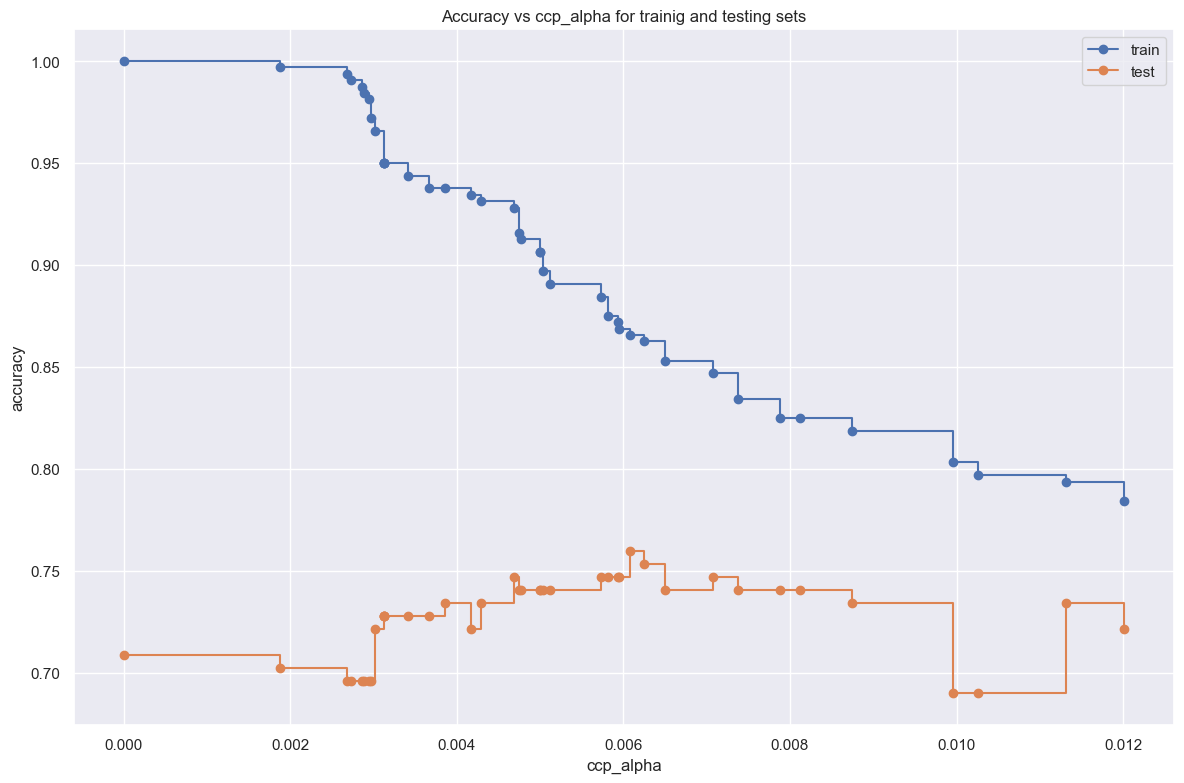

In [20]:
plt.rcParams["figure.figsize"] = [12.00, 8.00]
fig, ax = plt.subplots()
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs ccp_alpha for trainig and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
<p>The graph of accuracy vs ccp_alpha show the variation in the accuracy with respect to ccp_alpha values in Training and Test data. The peak accuracy is around ccp_alpha value of 0.006.</p>
</div>

In [21]:
# Get the index of the peak accuracy on the test data
index_max = test_scores.index(max(test_scores))

### 4. Develpment of Base Decision Tree Classification Model with optimized Cost Complexity Pruning

#### 4.1 Base Model Parameters

In [22]:
clf_dts[index_max].get_params()

{'ccp_alpha': 0.006079727564102565,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### 4.2 Base Model DT Structure

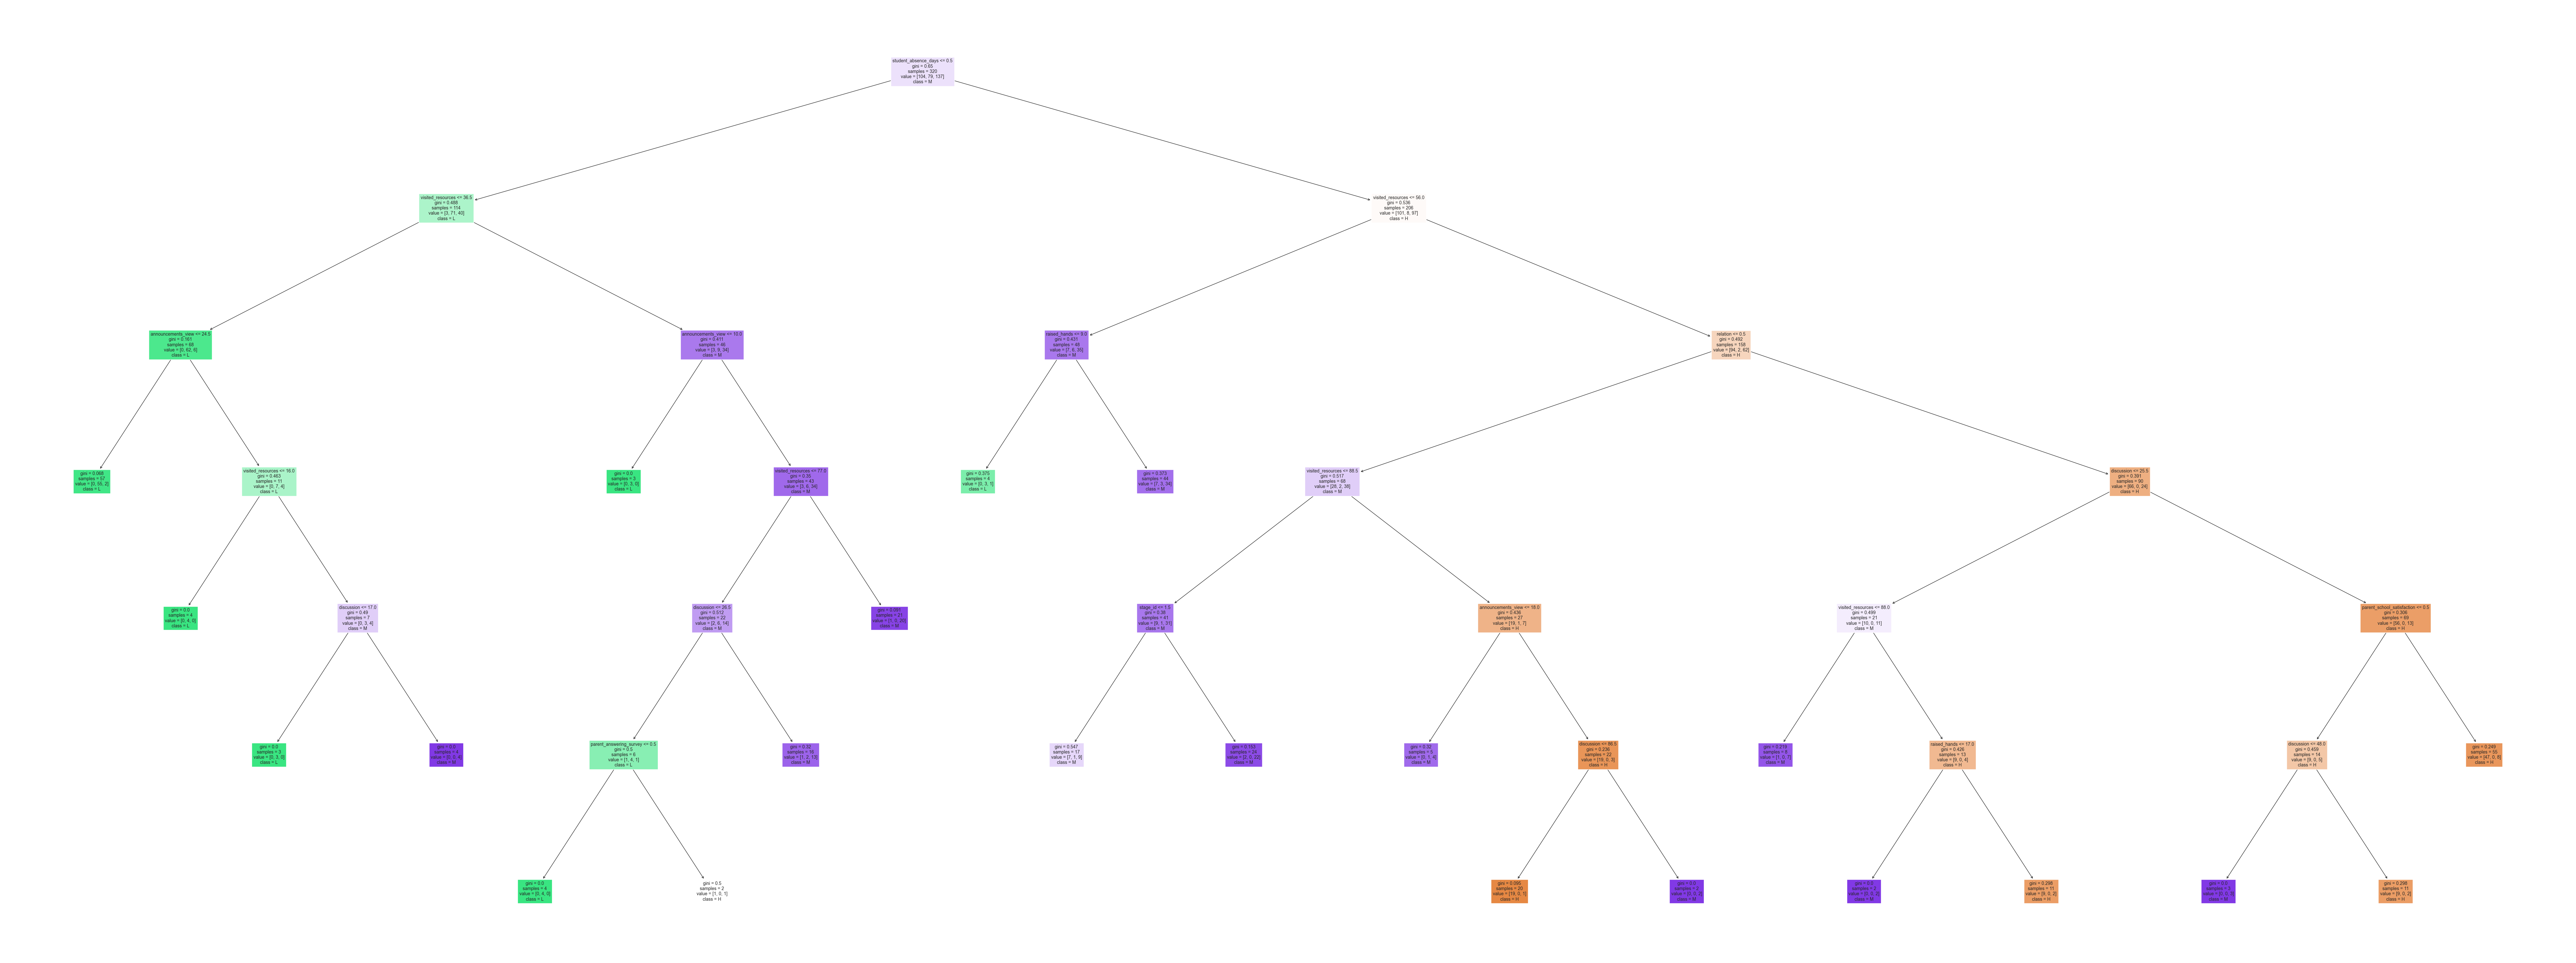

In [23]:
fig = plt.figure(figsize=(80,30))
_=plot_tree(clf_dts[index_max], feature_names = X.columns,
                 class_names ={0:'H', 1:'L', 2:'M'},
                 filled = True,
                  fontsize=10)

In [24]:
# Get the maximum depth of the tree
print(f'Base Model Decision Tree Depth : {clf_dts[index_max].get_depth()}')
# Number of leaves 
print(f'Base Model Decision Tree, Number of Leaves : {clf_dts[index_max].get_n_leaves()}')

Base Model Decision Tree Depth : 6
Base Model Decision Tree, Number of Leaves : 22


#### 4.3 Base Model Scores

In [25]:
# Test Accuracy
base_y_test = clf_dts[index_max].predict(X_test)
base_test_accuracy = accuracy_score(y_test, base_y_test)
print(f'Base Model DT Test Accuracy: {base_test_accuracy*100}')
# Train Accuracy
base_y_train = clf_dts[index_max].predict(X_train)
base_train_accuracy = accuracy_score(y_train, base_y_train)
print(f'Base Model DT Train Accuracy: {base_train_accuracy*100}')

Base Model DT Test Accuracy: 75.9493670886076
Base Model DT Train Accuracy: 86.5625


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the based model on Training Data (86.56%) is greater than the accuracy on Test Data (75.95%) means the model is still slightly overfitting. This is a normal case with Decision Tree and is kind of a tradeoff.</p>
</div>

#### 4.4 Base Model Confusion Matrix

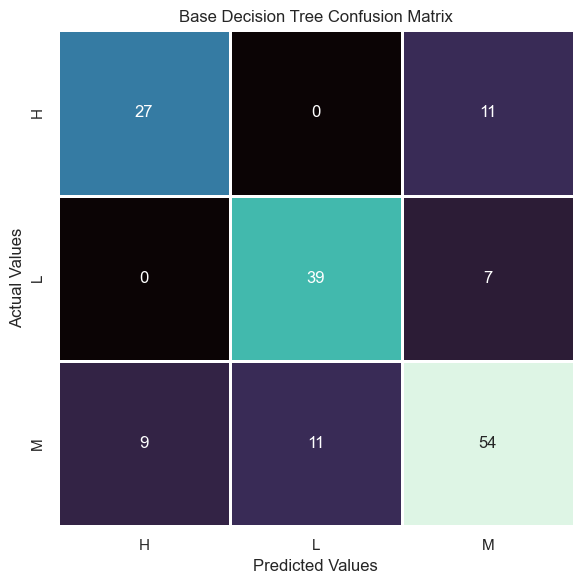

In [26]:
bcm_df = pd.DataFrame(confusion_matrix(y_test, base_y_test),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(bcm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Base Decision Tree Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 4.5 Base Model Classification report

In [27]:
print('Base DT Classification Report\n')
print(classification_report(y_test,base_y_test, target_names=['H','L','M']))

Base DT Classification Report

              precision    recall  f1-score   support

           H       0.75      0.71      0.73        38
           L       0.78      0.85      0.81        46
           M       0.75      0.73      0.74        74

    accuracy                           0.76       158
   macro avg       0.76      0.76      0.76       158
weighted avg       0.76      0.76      0.76       158



### 5. k-Fold Cross Validation

In [28]:
# Model
clf_cv = DecisionTreeClassifier(random_state =42, ccp_alpha = 0.006079727564102565)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(clf_cv, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)

# Performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.709 (0.066)


### 6. Model Learning Curve

In [29]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(random_state =42, ccp_alpha = 0.006079727564102565)
train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
    )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


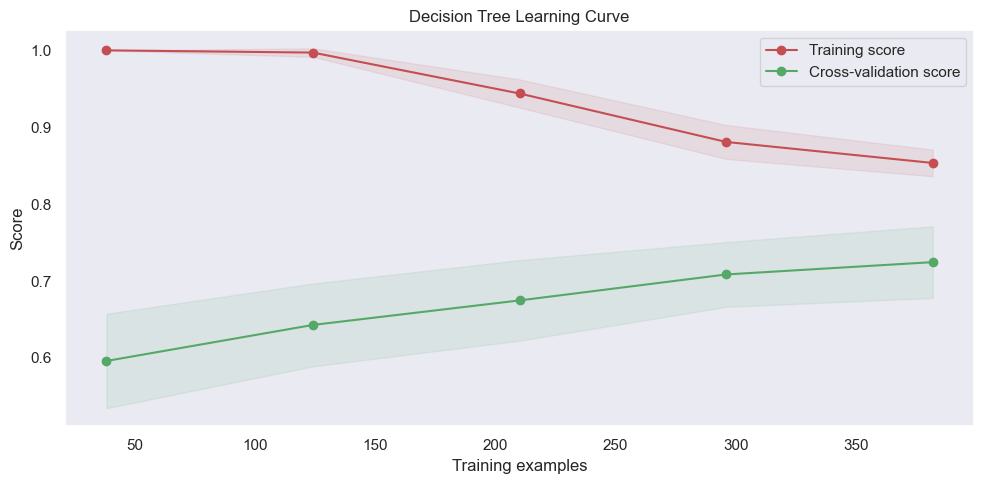

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('Decision Tree Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

# Plot learning curve
ax.grid()
ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",)

ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",)
    
ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")   
ax.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")   
ax.legend(loc="best");

## Observations
  
The key observations in the devleopment of base model are:  
   
1. The Initial Decision Tree Model has:     
    a. Depth of 12 nodes with 78 leaves    
    b. Test Accuracy of 70.89%     
    c. Train Accuracy of 100%     
2. Minimal Cost Complexity Pruning at ccp_alph of approximately 0.0061 results in highest accuracy of 75.89%.
3. The Base Decision Tree Model has:   
    a. Depth of 6 nodes with 22 leaves    
    b. Test Accuracy of 75.95%     
    c. Train Accuracy of 86.56%    
4. The 10 Fold Cross Validation for the Base Decision Tree resulted in Mean Accuracy of 70.9%.

## Conclusion
Based on the obervations:

1. The Base Decision Tree Classification Model with Minimal Cost Complexity Prunning produced the maximum test accuracy of 75.95%.
2. The Cross Validation produced mean accuracy of 70.9% that show the model quite well trained and generalized over the given data.
3. The Base Model sets the benchmark accuracy for evaluating other ML predictive models. 